# How to run this program
First, please make sure that you have **python3** installed (preferably **Anaconda** package).

Then use **jupyter notebook** to run the **.ipynb** file.

If you have any missing python modules, please install them using **pip install**.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading data
Load the MovieLens data (educational version)

In [2]:
%%time
data_path = "ml-latest-small/ratings.csv"
data = pd.read_csv(data_path, sep=',', header=0)
data = data[['userId', 'movieId', 'rating']]

Wall time: 56.2 ms


In [3]:
user_ids = sorted(set(data['userId']))
movie_ids = sorted(set(data['movieId']))
n_users = len(user_ids)
n_movies = len(movie_ids)

print("Number of users: {}\nNumber of movies: {}".format(n_users, n_movies))

Number of users: 671
Number of movies: 9066


In [4]:
# show how many users have rated a certain movie
vector_sizes = data.groupby('movieId')['userId'].nunique().sort_values(ascending=False)
print(vector_sizes)
print('On average, each movie is rated {} times'.format(vector_sizes.mean()))

movieId
356       341
296       324
318       311
593       304
260       291
480       274
2571      259
1         247
527       244
589       237
1196      234
110       228
1270      226
608       224
1198      220
2858      220
780       218
1210      217
588       215
457       213
2959      202
590       202
47        201
50        201
4993      200
858       200
364       200
150       200
380       198
32        196
         ... 
26694       1
26695       1
26701       1
3003        1
26492       1
26346       1
3021        1
26349       1
26350       1
26371       1
26393       1
3031        1
26394       1
26400       1
3025        1
26404       1
26409       1
26413       1
26487       1
26414       1
26422       1
26430       1
26435       1
26462       1
26464       1
26467       1
26471       1
26480       1
26485       1
163949      1
Name: userId, dtype: int64
On average, each movie is rated 11.030664019413193 times


In [5]:
# show examples of the data
data

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
5,1,1263,2.0
6,1,1287,2.0
7,1,1293,2.0
8,1,1339,3.5
9,1,1343,2.0


# Mean centering
Subtract mean of rating for each user

In [6]:
%%time
# find the mean of each user
user_group = data.groupby(by='userId')
user_means = user_group['rating'].agg(['mean', 'count'])

Wall time: 9.02 ms


In [7]:
# create a new column named "meanCenteredRating"

# this function takes in ratings of one user and return mean_centered ratings of that user
mean_centering = lambda ratings: ratings - ratings.mean()
data['meanCenteredRating'] = user_group['rating'].transform(mean_centering)
data

,userId,movieId,rating,meanCenteredRating
0,1,31,2.5,-0.050000
1,1,1029,3.0,0.450000
2,1,1061,3.0,0.450000
3,1,1129,2.0,-0.550000
4,1,1172,4.0,1.450000
5,1,1263,2.0,-0.550000
6,1,1287,2.0,-0.550000
7,1,1293,2.0,-0.550000
8,1,1339,3.5,0.950000
9,1,1343,2.0,-0.550000


In [8]:
# show user means
user_means

,mean,count
userId,,
1,2.550000,20
2,3.486842,76
3,3.568627,51
4,4.348039,204
5,3.910000,100
6,3.261364,44
7,3.465909,88
8,3.866379,116
9,3.755556,45


# Splitting data
Split the data into training set and test set. Prepare the training set as a user-item ratings matrix.

In [10]:
# randomly split the data set
test_size = 0.05
data_train, data_test = train_test_split(data, test_size=test_size, random_state=42)

# show shape of the data
data_train.shape, data_test.shape

((95003, 4), (5001, 4))

In [11]:
%%time
# build userId to row mapping dictionary
user2row = dict()
row2user = dict()
for i, user_id in enumerate(user_ids):
    user2row[user_id] = i
    row2user[i] = user_id

# build movieId to column mapping dictionary
movie2col = dict()
col2movie = dict()
for i, movie_id in enumerate(movie_ids):
    movie2col[movie_id] = i
    col2movie[i] = movie_id

Wall time: 4.01 ms


In [12]:
%%time
# turn ratings data in table format into a user-item rating matrix
# the field will be filled with NaN if user didn't provide a rating
def data_to_matrix(data):
    mat = np.full((n_users, n_movies), np.nan, dtype=np.float32)
    for idx, row in data.iterrows():
        mat[user2row[row['userId']], movie2col[row['movieId']]] = row['meanCenteredRating']
    return mat

# prepare the data as a user-item rating matrix for the next step
train_ratings = data_to_matrix(data_train)

Wall time: 5.73 s


# Compute similarity matrix
Build the item-item similarity matrix. This section takes most of the processing time.

In [13]:
# create a blank similarity matrix containing zeros
%time sim_matrix = np.empty((n_movies, n_movies), dtype=np.float32)
sim_matrix.shape

Wall time: 0 ns


(9066, 9066)

In [14]:
# remove co-elements from 2 vectors if at least one of them is NaN
def remove_nans(a, b):
    # assuming that a and b are 1-d vectors, create a new axis for both of them
    a = a[..., np.newaxis]
    b = b[..., np.newaxis]
    concat = np.concatenate([a, b], axis=1)
    nonan = concat[~np.isnan(concat).any(axis=1)]
    return nonan[:, 0], nonan[:, 1]

# show examples of how to use remove_nans()
a = np.array([-1,2     ,np.nan,4])
b = np.array([-2,np.nan,3     ,5])
remove_nans(a, b)

(array([-1.,  4.]), array([-2.,  5.]))

In [15]:
# calculate a similarity value given 2 vectors
# the output is a value between -1 and 1
# min_co_elements is the number that determine whether to output NaN
# or output the similarity value, if co-elements are too low, the similarity
# will not be a good estimate, e.g. if there is only 1 co-element then the output
# will only be either -1 or 1, that's sometimes not desirable, so a threshold should be given
def calsim(item1, item2, min_co_elements=1):
    item1, item2 = remove_nans(item1, item2)
    if item1.size == 0 or item1.size < min_co_elements: # item1 and item2 must have the same size at this point
        return np.nan
#     print(item1.size)
    dot = item1.dot(item2)
    # find magnitude A.K.A. length of the vector by taking sqrt of the sum of squares of each element
    norm1 = np.linalg.norm(item1)
    norm2 = np.linalg.norm(item2)
    return dot / (norm1 * norm2)

# show example of how to use calsim()
calsim(a, b)

0.99083016804429913

In [17]:
# either load or run the next cell to compute similarity matrix
sim_matrix = np.load('sim_matrix.npy')

In [ ]:
%%time
# calculate all the similarities
for item1 in range(n_movies):
    item1vector = train_ratings[:, item1]
    for item2 in range(item1, n_movies):
        item2vector = train_ratings[:, item2]
        sim = calsim(item1vector, item2vector, min_co_elements=2)
        sim_matrix[item1, item2] = sim
        sim_matrix[item2, item1] = sim
    if (item1+1) % 50 == 0 or item1+1 == n_movies:
        print("Progress: {}/{} ({:.2f} %) items calculated".format(item1+1, n_movies, (item1+1)*100/n_movies))

In [ ]:
%%time
# this sim matrix takes a lot of time to compute,
# so saving it to the disk will help saving time in the future
np.save('sim_matrix', sim_matrix)

In [18]:
print('Fractions of similarity matrix that are NaN:', np.isnan(sim_matrix).mean())

Fractions of similarity matrix that are NaN: 0.936411215661


# Recommendation
Test recommendation using the item-item similarity matrix built previously.

1. We first need to define a predict() function then use it repeatedly to predict rating of every movie of a given user.
2. We then sort the predictions and show movies with top predictions

In [19]:
# define a predict function which receives row and column in the ratings matrix
# then output a rating value (without mean addition), or np.nan if there are no co-items
# user_item is a tuple (user_row, movie_column)
# sim_threshold is the similarity threshold of each item,
# if the item exceeds this value, it will be chosen for averaging the outcome
def predict(ratings, user_item, sim_threshold, debug=True):
    desired_user, desired_item = user_item
    rating_sum = 0.
    total_sim = 0.
    for item in range(ratings.shape[1]):
        s = sim_matrix[item, desired_item]
        rating = ratings[desired_user, item]
        if np.isnan(s) or s < sim_threshold or item == desired_item or np.isnan(rating):
            continue
        rating_sum += s * rating
        total_sim += s
        if debug:
            print('sim and rating of item {}:'.format(item), s, rating)
    return rating_sum / total_sim if total_sim else np.nan

In [20]:
# this is the similarity threshold value, as the only hyperparameter available
sim_threshold = 0.

In [21]:
predict(train_ratings, (0, 30), sim_threshold), train_ratings[0, 30]

sim and rating of item 906: 0.117642 -0.55
sim and rating of item 1017: 0.0505805 -0.55
sim and rating of item 1111: 0.815062 -0.05
sim and rating of item 1140: 0.0289128 -1.55
sim and rating of item 1665: 0.064384 1.45
sim and rating of item 1708: 0.550293 0.45
sim and rating of item 1815: 0.73969 -0.55
sim and rating of item 2925: 0.0604668 0.45


(-0.089294769241499483, -0.050000001)

In [22]:
# load the movie names
movie_file = "ml-latest-small/movies.csv"
movie_df = pd.read_csv(movie_file, header=0)
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
# desired_user is the user row that we want to recommend
# return recommended item indices sorted by rating descendingly, and the associated score
def recommend(ratings, desired_user, sim_threshold):
    scores = []
    for item in range(ratings.shape[1]):
        score = ratings[desired_user, item]
        if np.isnan(score):
            score = predict(ratings, (desired_user, item), sim_threshold, debug=False)
        else:
            score = -np.infty # we don't want to recommend movies that user have rated
        scores.append(score)
    scores = np.array(scores)
    scores_argsort = np.argsort(scores)[::-1]
    scores_sort = np.sort(scores)[::-1]
    
    # numpy will put nan into the back of the array after sort
    # when we reverse the array, nan will be at the front
    # we want to move nan into the back again
    # so we use a numpy trick which rolls the array value
    # source: https://stackoverflow.com/a/35038821/2593810
    no_of_nan = np.count_nonzero(np.isnan(scores))
    scores_argsort = np.roll(scores_argsort, -no_of_nan)
    scores_sort = np.roll(scores_sort, -no_of_nan)
    return scores_argsort, scores_sort

def recommend_msg(user_row, scores_argsort, scores_sort, how_many=10):
    m = user_means.loc[row2user[user_row]]['mean']
    print('User mean rating:', m)
    msg = pd.DataFrame(columns=['movieId', 'title', 'genres', 'rating'])
    for i in range(how_many):
        col = scores_argsort[i]
        movie_id = col2movie[col]
        movie = movie_df.loc[movie_df['movieId'] == movie_id].iloc[0]
        msg.loc[i+1] = [movie_id, movie['title'], movie['genres'], scores_sort[i] + m]
    msg['movieId'] = msg['movieId'].astype(np.int32)
    return msg

In [24]:
%%time
user = 0 # the given user
scores_argsort, scores_sort = recommend(train_ratings, user, sim_threshold)

Wall time: 1min 40s


In [25]:
scores_argsort, scores_sort

(array([4880, 1387, 5743, ..., 6415, 7230, 6420], dtype=int64),
 array([ 1.45000012,  1.45000012,  1.45000011, ...,         nan,
                nan,         nan]))

In [26]:
recommend_msg(user, scores_argsort, scores_sort, how_many=10)

User mean rating: 2.55


,movieId,title,genres,rating
1,6951,"Cat in the Hat, The (2003)",Children|Comedy,4.0
2,1769,"Replacement Killers, The (1998)",Action|Crime|Thriller,4.0
3,26231,Performance (1970),Crime|Drama|Thriller,4.0
4,36276,Hidden (a.k.a. Cache) (Caché) (2005),Drama|Mystery|Thriller,4.0
5,4443,Outland (1981),Action|Sci-Fi|Thriller,4.0
6,139757,Best of Enemies (2015),Documentary,4.0
7,4570,"Big Picture, The (1989)",Comedy|Drama,4.0
8,3928,Abbott and Costello Meet Frankenstein (1948),Comedy|Horror,4.0
9,1943,"Greatest Show on Earth, The (1952)",Drama,4.0
10,3181,Titus (1999),Drama,4.0


# Evaluation
Evaluate the error on the test set. The error metric chosen in our work is **MAE**.
1. We need to predict mean centered ratings of every (user,movie) pair in the test data
2. Take the difference between the true ratings and the predicted ratings
3. Take the absolute
4. Take the mean

And that's how the error is computed.

In [27]:
# first, let's take a look at some of the test data
data_test.head()

,userId,movieId,rating,meanCenteredRating
19090,128,1028,5.0,1.139319
99678,665,4736,1.0,-2.285714
18455,120,4002,3.0,-0.485507
35755,257,1274,4.0,0.393204
66536,468,6440,4.0,1.034082


In [28]:
# predict ratings for the given data table
def predict_table(data_test, sim_threshold, show_progress=True):
    n_test = data_test.shape[0]
    predictions = np.empty((n_test,))
    i = 0
    for idx, row in data_test.iterrows():
        pred = predict(train_ratings, (user2row[row['userId']], movie2col[row['movieId']]), sim_threshold, debug=False)
        predictions[i] = pred
        if show_progress and ((i+1) % 100 == 0 or i+1 == n_test):
            print("Progress: {}/{} ({:.2f} %) ratings predicted".format(i+1, n_test, (i+1)*100/n_test))
        i += 1
    if show_progress:
        print("Progress: {}/{} ({:.2f} %) ratings predicted".format(i+1, n_test, (i+1)*100/n_test))
    return predictions

def eval_error(data_test, predictions):
    return np.abs(data_test['meanCenteredRating'] - predictions).mean()

In [29]:
%%time
# predicting ratings for every (user,movie) pair in the test data
predictions = predict_table(data_test, sim_threshold)

Progress: 100/5001 (2.00 %) ratings predicted
Progress: 200/5001 (4.00 %) ratings predicted
Progress: 300/5001 (6.00 %) ratings predicted
Progress: 400/5001 (8.00 %) ratings predicted
Progress: 500/5001 (10.00 %) ratings predicted
Progress: 600/5001 (12.00 %) ratings predicted
Progress: 700/5001 (14.00 %) ratings predicted
Progress: 800/5001 (16.00 %) ratings predicted
Progress: 900/5001 (18.00 %) ratings predicted
Progress: 1000/5001 (20.00 %) ratings predicted
Progress: 1100/5001 (22.00 %) ratings predicted
Progress: 1200/5001 (24.00 %) ratings predicted
Progress: 1300/5001 (25.99 %) ratings predicted
Progress: 1400/5001 (27.99 %) ratings predicted
Progress: 1500/5001 (29.99 %) ratings predicted
Progress: 1600/5001 (31.99 %) ratings predicted
Progress: 1700/5001 (33.99 %) ratings predicted
Progress: 1800/5001 (35.99 %) ratings predicted
Progress: 1900/5001 (37.99 %) ratings predicted
Progress: 2000/5001 (39.99 %) ratings predicted
Progress: 2100/5001 (41.99 %) ratings predicted
Progr

In [30]:
data_test['prediction'] = predictions
data_test.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,userId,movieId,rating,meanCenteredRating,prediction
19090,128,1028,5.0,1.139319,-0.000777
99678,665,4736,1.0,-2.285714,NaN
18455,120,4002,3.0,-0.485507,0.041654
35755,257,1274,4.0,0.393204,0.155186
66536,468,6440,4.0,1.034082,0.181659


In [31]:
data_test['abs_error'] = np.abs(data_test['meanCenteredRating'] - data_test['prediction'])
data_test.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,userId,movieId,rating,meanCenteredRating,prediction,abs_error
19090,128,1028,5.0,1.139319,-0.000777,1.140095
99678,665,4736,1.0,-2.285714,NaN,NaN
18455,120,4002,3.0,-0.485507,0.041654,0.527162
35755,257,1274,4.0,0.393204,0.155186,0.238017
66536,468,6440,4.0,1.034082,0.181659,0.852424


In [32]:
# mean absolute error
mae = data_test['abs_error'].mean()
mae

0.6830313136803959

# Error Optimization
Find the best set of hyperparameters that yields the lowest error on the test set.
In this work, we use **sim_threshold (similarity threshold)** as the only hyperparameter of the system.

We can find the best **sim_threshold** by iteratively
1. varying its value
2. predict outcome on the test set
3. evaluate the error
4. if the error is less than the least error found so far, save current **sim_threshold** as the best candidate

Repeat this cycle until enough satisfaction is achieved.

In [34]:
# define a set of avaialble similarity thresholds
candidate_sim_thresholds = np.linspace(-1, 0.75, num=16)
candidate_sim_thresholds

array([-1.        , -0.88333333, -0.76666667, -0.65      , -0.53333333,
       -0.41666667, -0.3       , -0.18333333, -0.06666667,  0.05      ,
        0.16666667,  0.28333333,  0.4       ,  0.51666667,  0.63333333,
        0.75      ])

In [35]:
%%time
errors = np.empty_like(candidate_sim_thresholds, dtype=np.float32)
for i, sim_threshold in enumerate(candidate_sim_thresholds):
    print('Current similarity threshold:', sim_threshold)
    predictions = predict_table(data_test, sim_threshold, show_progress=False)
    error = eval_error(data_test, predictions)
    print('Error:', error)
    errors[i] = error

Current similarity threshold: -1.0
Error: 7.988810899230984
Current similarity threshold: -0.883333333333
Error: 4.0885070346383445
Current similarity threshold: -0.766666666667
Error: 3.91262495818463
Current similarity threshold: -0.65
Error: 3.022584248995466
Current similarity threshold: -0.533333333333
Error: 1.0224778915303434
Current similarity threshold: -0.416666666667
Error: 0.8640781102381164
Current similarity threshold: -0.3
Error: 0.691688704575591
Current similarity threshold: -0.183333333333
Error: 0.6827043885684035
Current similarity threshold: -0.0666666666667
Error: 0.6835753948311755
Current similarity threshold: 0.05
Error: 0.68290199826614
Current similarity threshold: 0.166666666667
Error: 0.6832810060491642
Current similarity threshold: 0.283333333333
Error: 0.6847076670101073
Current similarity threshold: 0.4
Error: 0.687890669476367
Current similarity threshold: 0.516666666667
Error: 0.6984668837100138
Current similarity threshold: 0.633333333333
Error: 0.720

In [36]:
best_error_idx = np.argmin(errors)
best_error = errors[best_error_idx]
best_sim_threshold = candidate_sim_thresholds[best_error_idx]
errors

array([ 7.98881102,  4.08850718,  3.91262507,  3.0225842 ,  1.02247787,
        0.8640781 ,  0.69168872,  0.68270439,  0.68357539,  0.68290198,
        0.683281  ,  0.68470764,  0.68789065,  0.6984669 ,  0.72054148,
        0.73596406], dtype=float32)

In [37]:
print('Optimal similarity threshold:', best_sim_threshold)
print('Optimal error:', best_error)

Optimal similarity threshold: -0.183333333333
Optimal error: 0.682704


Plot the error as a function of **sim_threshold**.

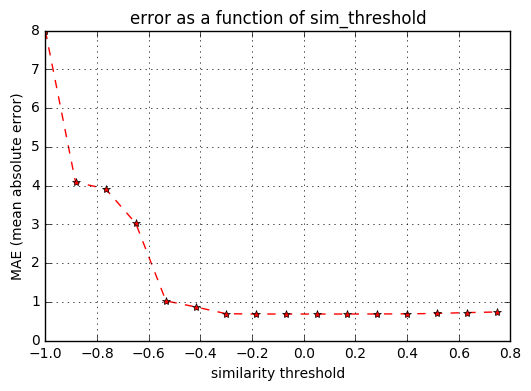

In [38]:
plt.plot(candidate_sim_thresholds, errors, 'r*--')
plt.xlabel('similarity threshold')
plt.ylabel('MAE (mean absolute error)')
plt.grid()
plt.title('error as a function of sim_threshold')
plt.show()

# Inference on the Real World
This is the last step, all we have done to this point is now on production.

**Our task:** Given a user, recommend some movies.

In [39]:
# choose a user_id from the data
user_id = 500

In [40]:
%%time
user_row = user2row[user_id]
scores_argsort, scores_sort = recommend(train_ratings, user_row, best_sim_threshold)

Wall time: 1min 40s


In [41]:
recommend_msg(user_row, scores_argsort, scores_sort, how_many=10)

User mean rating: 2.98192771084


,movieId,title,genres,rating
1,5752,Gregory's Girl (1981),Comedy|Romance,6.274220
2,1596,Career Girls (1997),Drama,5.026819
3,6211,Ten (2002),Drama,5.000000
4,2983,"Ipcress File, The (1965)",Thriller,4.856831
5,70862,It Might Get Loud (2008),Documentary,4.796860
6,50685,Waitress (2007),Comedy|Drama|Romance,4.722129
7,8014,"Spring, Summer, Fall, Winter... and Spring (Bo...",Drama,4.548294
8,105246,Mood Indigo (L'écume des jours) (2013),Drama|Fantasy,4.523443
9,5646,Valmont (1989),Drama|Romance,4.500000
10,37853,Into the Blue (2005),Action|Adventure|Crime|Thriller,4.500000
